In [1]:
import torch
from segment_anything import sam_model_registry

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

sam = sam_model_registry[MODEL_TYPE](checkpoint="./sam_vit_h_4b8939.pth")
sam.to(device=DEVICE)


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU()
        )
      )
      (1): Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        

In [2]:
import cv2
from segment_anything import SamAutomaticMaskGenerator
import supervision as sv
import numpy as np

mask_generator = SamAutomaticMaskGenerator(sam)
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

In [5]:
image_bgr = cv2.imread("./images/demo_rgb.png")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [6]:
sam_result = mask_generator.generate(image_rgb)

In [10]:
detections = sv.Detections.from_sam(sam_result=sam_result)

In [ ]:
print(detections)

In [8]:
annotated_image = mask_annotator.annotate(scene=np.zeros(image_rgb.shape, dtype=np.uint8), detections=detections)

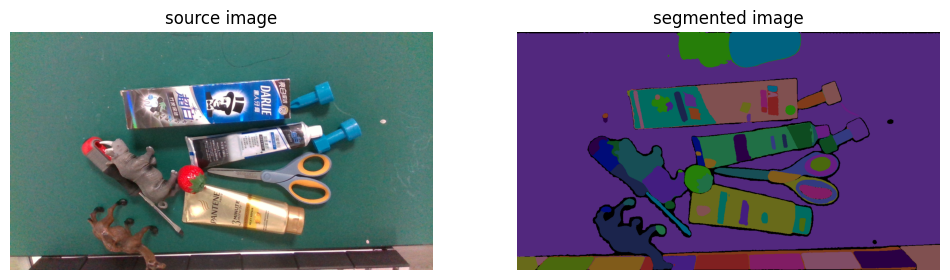

True

In [9]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

cv2.imwrite('annotated_image.jpg', annotated_image)